In [2]:
%cd "/home/gromovl/Programming/ml_final-project/mle-ss23_final-project"

/home/gromovl/Programming/ml_final-project/mle-ss23_final-project


## Test features

In [7]:
import numpy as np
from helper import get_safety_feature, get_allowed_actions, get_blast_coords, find_path_to_target, get_coin_feature
field = np.full((17, 17), -1) # empty field

# Place walls in between
aisles = {} #store locations in a dictionary
for i in range(1,8):
   aisles[2*i-1] = [i for i in range(1,16)] #3,5,7,9,11,13,15
   aisles[2*i] = [1,3,5,7,9,11,13,15] #2,4,6,8,10,12,14,16

aisles[15] = [i for i in range(1,16)]


# Set all walls
for row_index in range(1,16):
  for column_index in aisles[row_index]:
    field[row_index, column_index] = 0

#print(np.sum(field == 0))


my_x, my_y = agent_pos = (7, 9)

explosion_map = np.zeros((17, 17))
#explosion_map[my_x - 1, my_y] = 1

bombs = [#((agent_pos[0] + 3, agent_pos[1]), 0), 
         #((agent_pos[0], agent_pos[1] - 2), 1)
        ]

crates = np.array([(agent_pos[0], agent_pos[1] - 1),
                   #(agent_pos[0], agent_pos[1] + 1),
                   (agent_pos[0] - 1, agent_pos[1]),
                   #(agent_pos[0] + 1, agent_pos[1]),
                  ])

coins = np.array([(agent_pos[0], agent_pos[1] - 2),
                   (agent_pos[0] + 2, agent_pos[1] + 3)])

other_agents = np.array([(agent_pos[0], agent_pos[1] - 5)])

if len(crates) > 0:
  field[tuple(crates.T)] = 1

print("UP", "RIGHT", "DOWN", "LEFT", "WAIT")
#print("Safety feature", get_safety_feature(agent_pos, field, explosion_map, bombs))
#path = find_path_to_target(agent_pos, coins[0], field)
#print(path[1])
coin_feature = get_coin_feature(agent_pos, other_agents, coins, field)
print(coin_feature)

if len(coins) > 0:
  field[tuple(coins.T)] = 5

if len(other_agents) > 0:
  field[tuple(other_agents.T)] = 9

field[agent_pos] = 2

field[explosion_map > 0] = 4

for bomb in bombs:
  b = bomb[0]
  field[b] = 6

print(field.T)


UP RIGHT DOWN LEFT WAIT
RIGHT
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [-1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [-1  0 -1  0 -1  0 -1  9 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [-1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0 -1]
 [-1  0 -1  0 -1  0 -1  1 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0 -1]
 [-1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [-1  0 -1  0 -1  0 -1  0 -1  5 -1  0 -1  0 -1  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [-1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [18]:
import torch
table_path = "agent_code/qtable_agent/model/my-model.pt"
table = torch.load(table_path)
print(f"Table shape {table.shape}")
print(f"Number of elements {table.numel()}")
print(f"RAM {table.numel() * table.element_size() / (2**20)} MB")

Table shape torch.Size([5, 2, 2, 2, 2, 2, 2, 6])
Number of elements 1920
RAM 0.0146484375 MB


In [4]:
import torch
table_stat_path = "agent_code/qtable_agent/model/my-model_stats.pt"
table_stats = torch.load(table_stat_path)
explored_states = (table_stats > 0)
n_explored_states = torch.sum(explored_states)
print(f"Explored state ratio: {n_explored_states}/{table_stats.numel()} = {torch.sum(table_stats > 0) / table_stats.numel():.2%}")

Explored state ratio: 1058/1920 = 55.10%


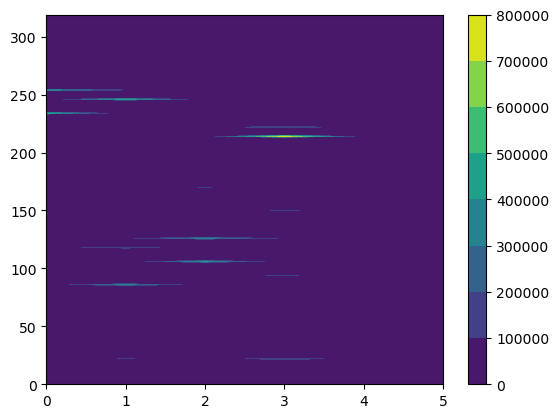

In [5]:
from matplotlib import pyplot as plt
import numpy as np
state_action_table = table_stats.reshape(-1, 6)
s = np.arange(0, state_action_table.shape[0])
a = np.arange(0, state_action_table.shape[1])
S, A = np.meshgrid(a, s)
plt.contourf(S, A, state_action_table)
plt.colorbar()

plt.show()

## Code profiling

In [ ]:
%cd "/home/gromovl/Programming/ml_final-project/mle-ss23_final-project"
# TODO : matplotlib seems slow?
import pstats
from pstats import SortKey
p = pstats.Stats("profile.log")
p.sort_stats(SortKey.CUMULATIVE).print_stats("agent_code", 50)